<h1>Linear Regression on King's County Housing Data</h1>
<p>Here, I will show you how to predict house prices based on multiple features using linear regression. I will be building <b>gradient descent from scratch</b>. Let's begin</p>

<h3>Libraries used</h3>
<ul>
    <li>Numpy, for effective list manipulation</li>
    <li>csv, for reading the dataset</li>
    <li>Matplotlib, for data visualization</li>

In [7]:
import numpy as np
import csv
import matplotlib.pyplot as plt

<h2>Fetching the dataset</h2>
<p>We will be using the King's Country Housing dataset obtained from Kaggle. Using the csv.reader() function, we read the data from the dataset, separate the header labels and feature data from it and store it in different variables.

In [8]:
dataset = list(csv.reader(open('kc_house_data.csv')))
header = dataset[0]
dataset = np.array(dataset[1:])

print(header) #Features in the dataset

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


<h3>Choosing the features and the labels to be predicted</h3>
<p>The features that we'll use to predict the prices (labels) are :</p>
<ol>
    <li>No. of bedrooms</li>
    <li>Sq.ft. living</li>
    <li>No. of floors</li>
</ol>
<p>Moreover, to speed up calculations for gradient descent, I will make each of the feature values in roughly the same range. This can be done by calculating the z-score of each feature value. This technique is known as <b>feature scaling</b> and <b>mean normalization</b>.</p>
<p>Also, we visualize a scatter plot between sq.ft.living area and the price of the house repectively</p>

[[-0.62130183  0.43556968 -0.6230977 ]
 [-0.62130183  1.6837017  -0.62219977]
 [-0.62219977  0.06741563 -0.6230977 ]
 [-0.62040389  1.13596031 -0.6230977 ]
 [-0.62130183  0.88453803 -0.6230977 ]]
(21613, 3)


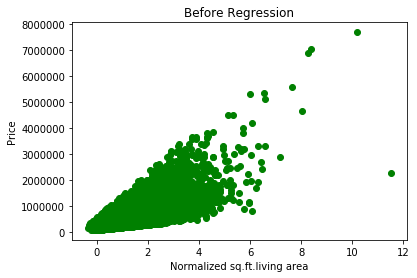

In [21]:
features = dataset[:,[3,5,7]].astype(float)
labels = dataset[:,2].astype(float)
features = (features - np.mean(features)) / np.std(features)
print(features[:5])
print(features.shape)

plt.scatter(features[:,1], labels, color="green")
plt.xlabel('Normalized sq.ft.living area')
plt.ylabel('Price')
plt.title('Before Regression')
plt.show()

<h3>Adding 1's to the feature matrix</h3>
<p>We add ones to the feature index 0 for all training examples as this allows us to do matrix operations with theta and x. Hence, making the two vectors 'theta' and 'x(i)' match each other element-wise i.e have the same number of elements.</p>

In [10]:
features = np.column_stack((np.ones(len(labels)), features))
print(features[:5])
print(features.shape)

[[ 1.         -0.62130183  0.43556968 -0.6230977 ]
 [ 1.         -0.62130183  1.6837017  -0.62219977]
 [ 1.         -0.62219977  0.06741563 -0.6230977 ]
 [ 1.         -0.62040389  1.13596031 -0.6230977 ]
 [ 1.         -0.62130183  0.88453803 -0.6230977 ]]
(21613, 4)


<h3>Optimizing parameters for our multivariate linear regression</h3>
<p>In gradient descent, we estimate the parameters in the hypothesis function that leads to minimization of the cost function. In other words, we try to get the optimal values of theta such that our regression line fits the data well.</p>
<p>The way we do this is by taking the derivative (the tangent line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter alpha, which is called the learning rate. </p>

In [13]:
def calculate_error(theta, x, y):
    return np.subtract(np.dot(x, theta), y)

def calculate_gradient(cost, x):
    return np.sum(np.dot(np.transpose(x), cost)) / x.shape[0]

def gradient_descent(x, y, alpha=0.03, epochs=10000):
    theta = np.zeros(x.shape[1])
    for _ in range(epochs):
        cost = calculate_error(theta, x, y)
        gradient = calculate_gradient(cost, x)
        theta = theta - alpha * gradient
    return theta

optimized_theta = gradient_descent(features, labels)
print(optimized_theta)

theta0, theta1 = optimized_theta[0], optimized_theta[2]

[447765.26853914 447765.26853914 447765.26853914 447765.26853914]


<h3>Visualizing our regression line after getting the optimal parameters</h3>
<p>We get the optimal paramters for which the cost function is zero. Now we choose the first (intercept) and the third (for sq.ft.living) parameter so as to visualize how well the regression line fits to our sq.ft.living v/s price data</p>

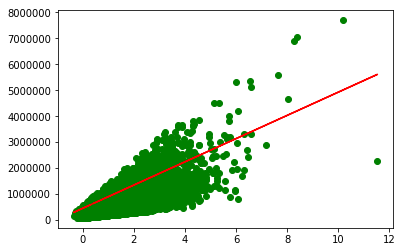

In [20]:
plt.scatter(features[:,1], labels, color="green")
plt.plot(features[:,1], theta0 + theta1 * features[:,1], color="red")
plt.show()